In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import math

In [4]:
# Define the stock symbol and the time period
ticker = 'PG'  # Example: Apple Inc.
start_date = '2020-01-01'
end_date = '2025-01-01'

# Fetch the OHLC data for the specified stock
data = yf.download(ticker, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
PG = data.reset_index()
PG = pd.DataFrame(PG.values)
PG.columns = [	'Date', 'Close',	'High',	'Low',	'Open',	'Volume' ]

In [6]:
PG.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-02,108.419884,109.579548,108.006972,109.377483,8130800
1,2020-01-03,107.690689,108.525294,107.058144,107.321706,7970500
2,2020-01-06,107.840034,108.226592,107.514975,107.681898,6674400
3,2020-01-07,107.172348,108.24416,107.066928,107.954243,7583400
4,2020-01-08,107.629189,108.437438,107.181134,107.348058,5385100


**Simple Rate of Return**

In [7]:
PG['simple_return'] = (PG['Close']/PG['Close'].shift(1))-1

In [8]:
PG.set_index('Date', inplace=True)

In [9]:
PG.head()

,Close,High,Low,Open,Volume,simple_return
Date,,,,,,
2020-01-02,108.419884,109.579548,108.006972,109.377483,8130800,NaN
2020-01-03,107.690689,108.525294,107.058144,107.321706,7970500,-0.006726
2020-01-06,107.840034,108.226592,107.514975,107.681898,6674400,0.001387
2020-01-07,107.172348,108.24416,107.066928,107.954243,7583400,-0.006191
2020-01-08,107.629189,108.437438,107.181134,107.348058,5385100,0.004263


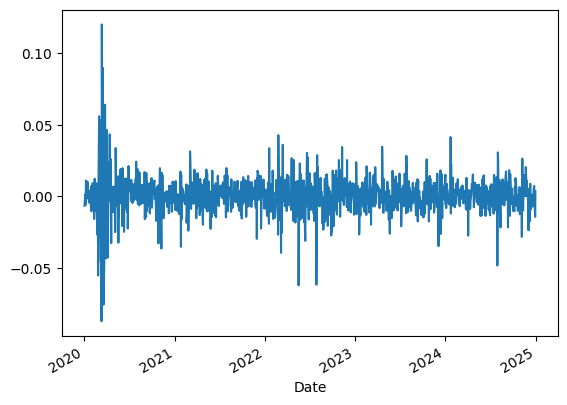

In [10]:
PG['simple_return'].plot()
plt.show()

In [11]:
annual_return = PG['simple_return'].mean()*250
print(annual_return)

0.10718074504280341


**Log Return**

In [13]:
PG['Close'] = pd.to_numeric(PG['Close'])

In [15]:
PG['log_return'] = np.log(PG['Close']/PG['Close'].shift(1))

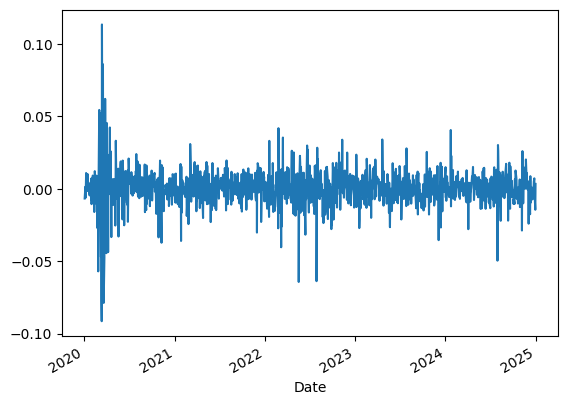

In [16]:
PG['log_return'].plot()
plt.show()

In [17]:
annual_return = PG['log_return'].mean()*250
print(annual_return)

0.08547886949601595


log return is slightly lower than the simple return

**Portfolio Security Rate of Return**

In [19]:
# Define the tickers you're interested in
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']  # Example tickers

# Download historical data for the tickers
data = yf.download(tickers, start='2020-01-01', end='2025-01-01')['Close']

[*********************100%***********************]  4 of 4 completed


In [26]:
df = data.reset_index()
df = pd.DataFrame(df.values)
df.columns = [	'Date', 'AAPL','AMZN','GOOGL','MSFT' ]
df = df.set_index('Date')

In [24]:
df.head()

,Date,AAPL,AMZN,GOOGL,MSFT
0,2020-01-02,72.716072,94.900497,68.108368,153.323257
1,2020-01-03,72.009117,93.748497,67.752075,151.414124
2,2020-01-06,72.582916,95.143997,69.557945,151.805511
3,2020-01-07,72.241562,95.343002,69.423584,150.421371
4,2020-01-08,73.403641,94.598503,69.917725,152.817322


**Normalization to 100**

# Pt/P0*100

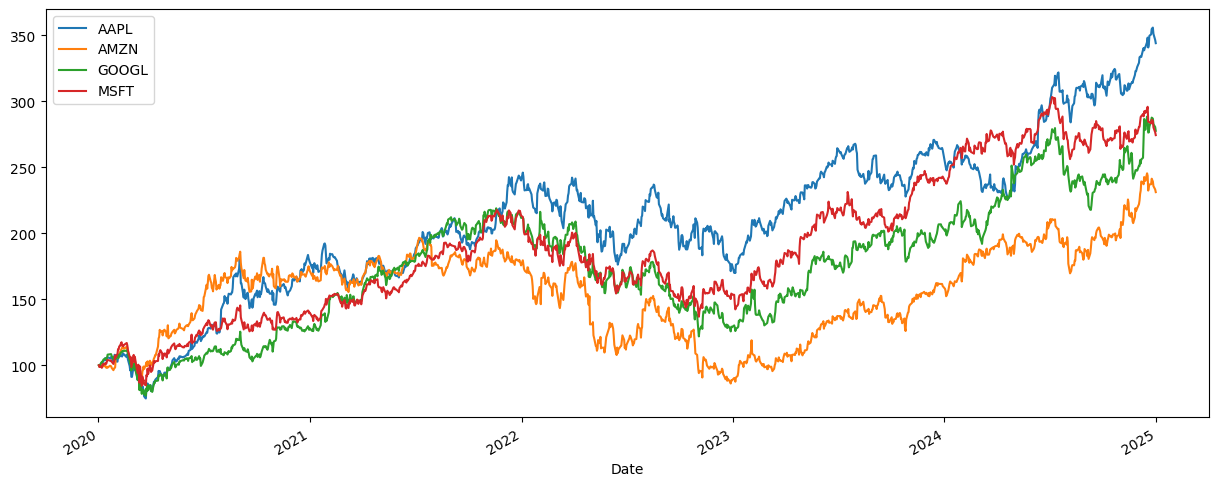

In [29]:
((df/df.iloc[0])*100).plot(figsize=(15,6))
plt.show()

> all start from 100

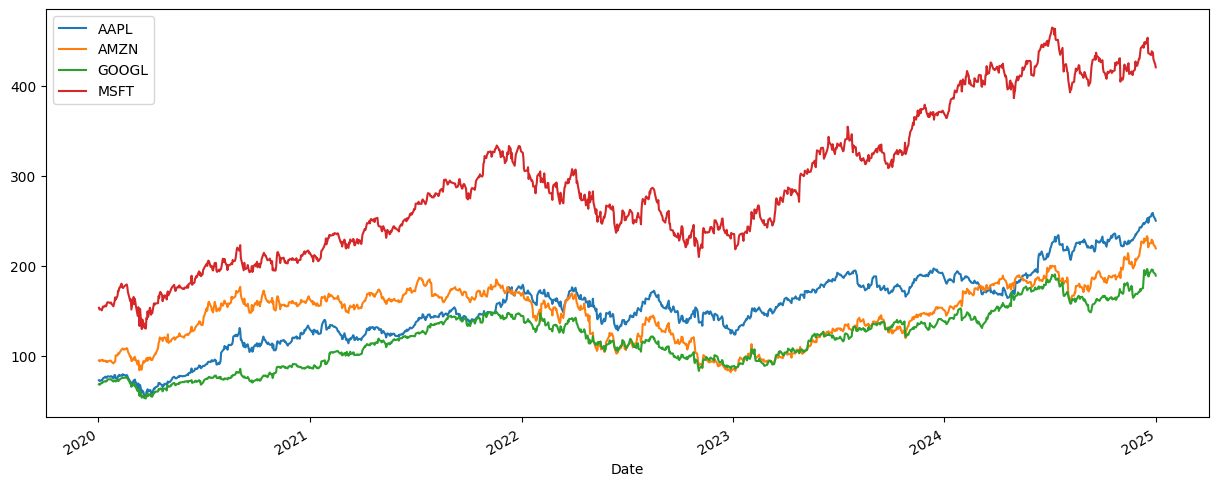

In [30]:
df.plot(figsize=(15,6))
plt.show()

# **Calculating Return of a Portfolio of Securities**

In [31]:
## get simple return bcoz multiple stocks
returns = (df/df.shift(1))-1

In [32]:
returns.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,-0.005231,-0.012452
2020-01-06,0.007968,0.014886,0.026654,0.002585
2020-01-07,-0.004703,0.002092,-0.001932,-0.009118
2020-01-08,0.016086,-0.007809,0.007118,0.015928


In [33]:
weights = np.array([0.25, 0.25, 0.25,0.25])

In [34]:
annual_returns = returns.mean()*250

In [35]:
annual_returns

,0
AAPL,0.295528
AMZN,0.230812
GOOGL,0.255563
MSFT,0.246955


In [36]:
portfolio1 = round(np.dot(annual_returns, weights),5)*100

In [37]:
portfolio1

25.721

In [38]:
weights2 = np.array([0.4, 0.4, 0.15,0.05])

In [39]:
portfolio2 = round(np.dot(annual_returns, weights2),5)*100
portfolio2

26.122